In [1]:
q_num = 1
folder = f"D:/Comparison_{q_num}/"

In [ ]:
from data import *
build_dataset(f"D:/duels_question_{q_num}.csv", 224, "D:/Sample_web_green", folder, 0.2, 0.2)

In [2]:
import tensorflow as tf
from Model_comparisons import *
dataset_val = tf.data.TFRecordDataset(folder+'data_val.tfrecord')
dataset_train = tf.data.TFRecordDataset(folder+'data_train.tfrecord')

batch_size = 6

dataset_train = dataset_train.map(map_fn)
dataset_train = dataset_train.shuffle(2048, reshuffle_each_iteration = True)
dataset_train = dataset_train.prefetch(buffer_size=tf.data.AUTOTUNE)
dataset_train = dataset_train.batch(batch_size)

dataset_val = dataset_val.map(map_fn)
dataset_val = dataset_val.prefetch(buffer_size=tf.data.AUTOTUNE)
dataset_val = dataset_val.batch(batch_size)

In [4]:
comp_model = comparisons_model(224)
#comp_model = load_model("D:/acc_checkpoint") #Or load in from a checkpoint

history_comp = comp_model.fit(dataset_train, validation_data = dataset_val, epochs = 50)

Epoch 1/50
487/487 [==============================] - 92s 155ms/step - loss: 0.9515 - accuracy: 0.5342 - val_loss: 0.6569 - val_accuracy: 0.6033
Epoch 2/50
487/487 [==============================] - 73s 148ms/step - loss: 0.7530 - accuracy: 0.6380 - val_loss: 0.5261 - val_accuracy: 0.7278
Epoch 3/50
487/487 [==============================] - 73s 148ms/step - loss: 0.6659 - accuracy: 0.7045 - val_loss: 0.4809 - val_accuracy: 0.7852
Epoch 4/50
487/487 [==============================] - 73s 148ms/step - loss: 0.6285 - accuracy: 0.7202 - val_loss: 0.5240 - val_accuracy: 0.8016
Epoch 5/50
487/487 [==============================] - 73s 148ms/step - loss: 0.5747 - accuracy: 0.7551 - val_loss: 0.4896 - val_accuracy: 0.8112
Epoch 6/50
487/487 [==============================] - 73s 148ms/step - loss: 0.5659 - accuracy: 0.7565 - val_loss: 0.4956 - val_accuracy: 0.8153
Epoch 7/50
487/487 [==============================] - 73s 147ms/step - loss: 0.5502 - accuracy: 0.7719 - val_loss: 0.4567 - val_ac

In [5]:
from keras import Model
vgg = Model(comp_model.layers[5].input, comp_model.layers[5].output)
rank_model = ranking_model(224, vgg_feature_extractor = vgg)

history_rank = rank_model.fit(dataset_train, validation_data = dataset_val, epochs = 50)

Epoch 1/50
487/487 [==============================] - 91s 179ms/step - loss: 0.7826 - accuracy: 0.7318 - val_loss: 1.3630 - val_accuracy: 0.7989
Epoch 2/50
487/487 [==============================] - 88s 178ms/step - loss: 0.8044 - accuracy: 0.7497 - val_loss: 0.8621 - val_accuracy: 0.7743
Epoch 3/50
487/487 [==============================] - 88s 178ms/step - loss: 0.8022 - accuracy: 0.7301 - val_loss: 0.6715 - val_accuracy: 0.8057
Epoch 4/50
487/487 [==============================] - 88s 178ms/step - loss: 0.7239 - accuracy: 0.7397 - val_loss: 0.8233 - val_accuracy: 0.7743
Epoch 5/50
487/487 [==============================] - 88s 178ms/step - loss: 0.6486 - accuracy: 0.7668 - val_loss: 0.6297 - val_accuracy: 0.7524
Epoch 6/50
487/487 [==============================] - 88s 178ms/step - loss: 0.6727 - accuracy: 0.7473 - val_loss: 0.6255 - val_accuracy: 0.7770
Epoch 7/50
487/487 [==============================] - 88s 178ms/step - loss: 0.6562 - accuracy: 0.7517 - val_loss: 1.6857 - val_ac

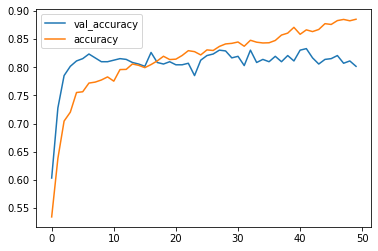

In [6]:
import matplotlib.pyplot as plt
plt.plot(history_comp.history['val_accuracy'], label="val_accuracy")
plt.plot(history_comp.history['accuracy'], label="accuracy")
plt.legend()
plt.savefig(folder + "comp_model_acc.png")

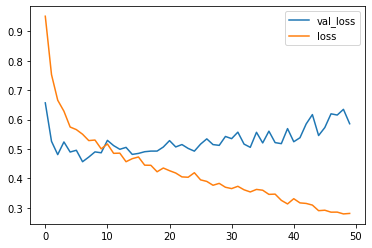

In [7]:
plt.plot(history_comp.history['val_loss'], label="val_loss")
plt.plot(history_comp.history['loss'], label="loss")
plt.legend()
plt.savefig(folder + "comp_model_loss.png")

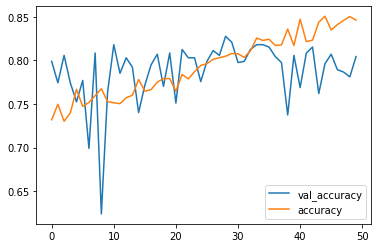

In [8]:
plt.plot(history_rank.history['val_accuracy'], label="val_accuracy")
plt.plot(history_rank.history['accuracy'], label="accuracy")
plt.legend()
plt.savefig(folder + "rank_model_acc.png")

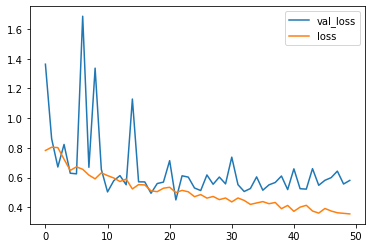

In [9]:
plt.plot(history_rank.history['val_loss'], label="val_loss")
plt.plot(history_rank.history['loss'], label="loss")
plt.legend()
plt.savefig(folder + "rank_model_loss.png")

In [9]:
rank_model.save(folder+"ranking_model.h5")

c:\users\lmacl\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [10]:
from Mapillary import *
api = Mapillary('MLY|4459801330748375|f17ddc8a7adbcbff6eea96b1cf4c2aad',
                [-75.7839321, 45.3210331], [-75.6517092, 45.4448763]) #Smaller Box around Ottawa
              #  [-75.9216253, 45.2157973], [-75.4695785, 45.4958371]) #Big Box around Ottawa

In [11]:
await api.generate_csv(rank_model, folder+"rankings.csv")

 Processing image 15936 | -75.643442697209 45.446899601139